In [1]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from matplotlib import pyplot as plt

tf.random.set_seed(678)

# Training and test data

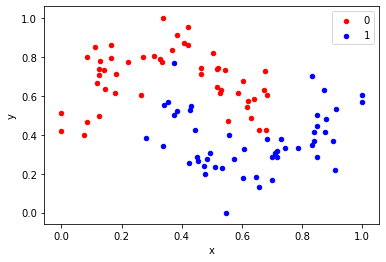

In [2]:
train_X, train_y = make_moons(n_samples=100, noise=0.2, random_state=1)
scaler = MinMaxScaler()
train_X_norm = scaler.fit_transform(train_X)

# scatter plot, dots colored by class value
df_train = DataFrame(dict(x=train_X_norm[:,0], y=train_X_norm[:,1], label=train_y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df_train.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

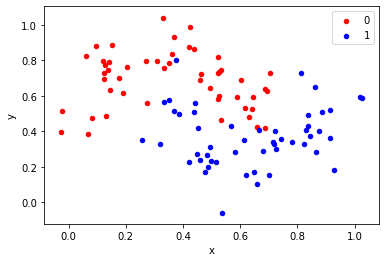

In [3]:
test_X, test_y = make_moons(n_samples=100, noise=0.25, random_state=1)
test_X_norm = scaler.transform(test_X)

# scatter plot, dots colored by class value
df_test = DataFrame(dict(x=test_X_norm[:,0], y=test_X_norm[:,1], label=test_y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df_test.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

# Train and test

In [4]:
model = Sequential()
model.add(Dense(units=2, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(train_X_norm, train_y, epochs=100, batch_size=8, verbose=1)

Train on 100 samples
Epoch 1/100
100/100 [==============================] - 1s 8ms/sample - loss: 0.6872 - accuracy: 0.5600
Epoch 2/100
100/100 [==============================] - 0s 240us/sample - loss: 0.6869 - accuracy: 0.6600
Epoch 3/100
100/100 [==============================] - 0s 250us/sample - loss: 0.6867 - accuracy: 0.8200
Epoch 4/100
100/100 [==============================] - 0s 250us/sample - loss: 0.6865 - accuracy: 0.6800
Epoch 5/100
100/100 [==============================] - 0s 250us/sample - loss: 0.6863 - accuracy: 0.5600
Epoch 6/100
100/100 [==============================] - 0s 240us/sample - loss: 0.6861 - accuracy: 0.6300
Epoch 7/100
100/100 [==============================] - 0s 240us/sample - loss: 0.6858 - accuracy: 0.5800
Epoch 8/100
100/100 [==============================] - 0s 240us/sample - loss: 0.6856 - accuracy: 0.6900
Epoch 9/100
100/100 [==============================] - 0s 260us/sample - loss: 0.6854 - accuracy: 0.7200
Epoch 10/100
100/100 [==============

100/100 [==============================] - 0s 280us/sample - loss: 0.6312 - accuracy: 0.8700
Epoch 79/100
100/100 [==============================] - 0s 250us/sample - loss: 0.6291 - accuracy: 0.8700
Epoch 80/100
100/100 [==============================] - 0s 250us/sample - loss: 0.6275 - accuracy: 0.8500
Epoch 81/100
100/100 [==============================] - 0s 240us/sample - loss: 0.6257 - accuracy: 0.8700
Epoch 82/100
100/100 [==============================] - 0s 250us/sample - loss: 0.6239 - accuracy: 0.8600
Epoch 83/100
100/100 [==============================] - 0s 300us/sample - loss: 0.6223 - accuracy: 0.8700
Epoch 84/100
100/100 [==============================] - 0s 470us/sample - loss: 0.6206 - accuracy: 0.8600
Epoch 85/100
100/100 [==============================] - 0s 330us/sample - loss: 0.6184 - accuracy: 0.8600
Epoch 86/100
100/100 [==============================] - 0s 290us/sample - loss: 0.6164 - accuracy: 0.8500
Epoch 87/100
100/100 [==============================] - 0s 

In [5]:
pred_y = model.predict(test_X_norm,batch_size=4)
pred_y_round = np.around((pred_y[:,0]))

print('Acuracy: ', accuracy_score(test_y, pred_y_round))
print('F1 acuracy: ', f1_score(test_y, pred_y_round))

Acuracy:  0.86
F1 acuracy:  0.8444444444444444


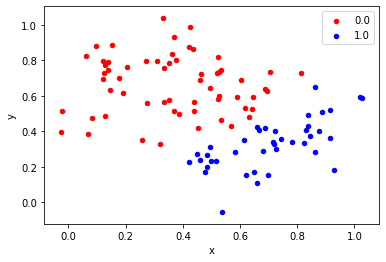

In [6]:
df_pred = DataFrame(dict(x=test_X_norm[:,0], y=test_X_norm[:,1], label=pred_y_round))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df_pred.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()